In [73]:
import h2o
import matplotlib.pyplot as plt
import seaborn as sn

In [3]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: java version "17.0.2" 2022-01-18 LTS; Java(TM) SE Runtime Environment (build 17.0.2+8-LTS-86); Java HotSpot(TM) 64-Bit Server VM (build 17.0.2+8-LTS-86, mixed mode, sharing)
  Starting server from /Users/devam/opt/anaconda3/lib/python3.9/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/x3/d9wqpd_j1mz8xzmnqzq0z_vr0000gn/T/tmpoc2ish_g
  JVM stdout: /var/folders/x3/d9wqpd_j1mz8xzmnqzq0z_vr0000gn/T/tmpoc2ish_g/h2o_devam_started_from_python.out
  JVM stderr: /var/folders/x3/d9wqpd_j1mz8xzmnqzq0z_vr0000gn/T/tmpoc2ish_g/h2o_devam_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,America/New_York
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.4
H2O_cluster_version_age:,1 month and 2 days
H2O_cluster_name:,H2O_from_python_devam_33lr1u
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,4 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [52]:
dset = h2o.import_file("//Users/devam/PycharmProjects/whizaieda/AQI_Bangalore_Jan-May_2023.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [53]:
dset.head()

C1,Date,NO2(ug/m3),SO2(ug/m3),CO(mg/m3),PM10(ug/m3),TEMP(degreeC),HR(%),WS(m/s),WD(degree),SR(W/m2),AQI
0,2023-01-01 00:00:00,36.9,5,0.53,134.6,29.4,77.7,0.65,147.4,285.1,62.8933
1,2023-01-02 00:00:00,36.5,3.5,0.28,91.4,30.7,58.4,0.55,160.9,168,74.125
2,2023-01-03 00:00:00,28.7,2.1,0.6,55.8,24.1,45.1,0.86,277.1,274.1,74.632
3,2023-01-04 00:00:00,17.2,6.8,0.3,116.3,24.9,52.7,0.4,180.9,255.6,109.132
4,2023-01-05 00:00:00,23.1,7,0.16,46.1,33.6,29.2,0.1,231.2,280.7,144.292
5,2023-01-06 00:00:00,36.6,7.7,0.1,125.5,33.9,77.9,0.61,163.8,159.9,80.806
6,2023-01-08 00:00:00,36.3,2.9,0.76,85.7,32.4,75.1,0.89,200.6,320,100.385
7,2023-01-09 00:00:00,26.1,7.8,0.78,78.7,28.3,66.1,0.74,281,200.8,112.1
8,2023-01-10 00:00:00,27.4,6.8,0.21,59.1,24.4,58.1,0.83,256.2,169.9,95.7016
9,2023-01-11 00:00:00,19.4,6.9,0.3,124.6,26.9,43,0.95,219.6,162.9,148.511


In [66]:
dset = dset.drop([0,1])

In [67]:
dset.describe()

Rows:135
Cols:10

,NO2(ug/m3),SO2(ug/m3),CO(mg/m3),PM10(ug/m3),TEMP(degreeC),HR(%),WS(m/s),WD(degree),SR(W/m2),AQI
type,real,real,real,real,real,real,real,real,real,real
mins,16.0,2.0,0.01,45.5,24.0,25.1,0.1,103.4,88.6,44.2
mean,27.519259259259254,5.014074074074076,0.5787407407407406,94.6,28.905925925925924,51.39481481481481,0.5177037037037039,190.6422222222222,229.6540740740741,97.81933503714902
maxs,39.8,7.9,0.99,139.3,33.9,80.8,0.99,282.5,349.6,151.7412
sigma,7.102548379072062,1.8178289069025695,0.25745722621011324,26.679697686756427,3.0900119055695616,15.603086752203675,0.2564509226586032,55.787596206928164,75.09517519625125,29.749251874309962
zeros,0,0,0,0,0,0,0,0,0,0
missing,0,0,0,0,0,0,0,0,0,0
0,36.9,5.0,0.53,134.6,29.4,77.7,0.65,147.4,285.1,62.893254
1,36.5,3.5,0.28,91.4,30.7,58.4,0.55,160.9,168.0,74.1249683
2,28.7,2.1,0.6,55.8,24.1,45.1,0.86,277.1,274.1,74.632


In [68]:
dset.isna()

isNA(NO2(ug/m3)),isNA(SO2(ug/m3)),isNA(CO(mg/m3)),isNA(PM10(ug/m3)),isNA(TEMP(degreeC)),isNA(HR(%)),isNA(WS(m/s)),isNA(WD(degree)),isNA(SR(W/m2)),isNA(AQI)
0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0


In [69]:
c = dset.cor()

In [70]:
c = c * 10

<AxesSubplot:>

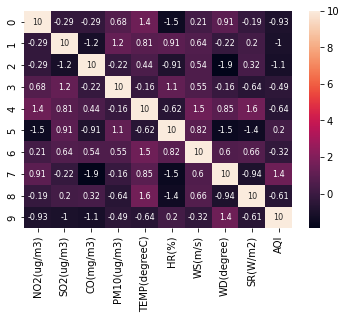

In [71]:
sn.heatmap(c.as_data_frame(),annot=True, annot_kws={"fontsize":8})

Lack of a strong correlation (scale by 10) between most variables. Let's plot strongest correlations and see how linear the association is. First, let's plot SR vs TEMP (value # 5 on the y-axis).

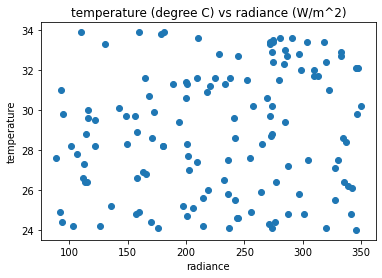

In [92]:
plt.scatter(dset["SR(W/m2)"].as_data_frame(), dset["TEMP(degreeC)"].as_data_frame())
plt.title("temperature (degree C) vs radiance (W/m^2)")
plt.ylabel("temperature")
plt.xlabel("radiance")
plt.show()

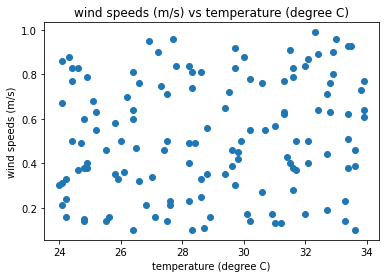

In [94]:
plt.scatter(dset['TEMP(degreeC)'].as_data_frame(), dset["WS(m/s)"].as_data_frame())
plt.title("wind speeds (m/s) vs temperature (degree C)")
plt.ylabel("wind speeds (m/s)")
plt.xlabel("temperature (degree C)")
plt.show()

Highest correlations, when scatterplotted, yield a random result. Therefore, there is no strong correlation between the variables in the dataset above.